#### Week 19 - Homework

###### Angela Spencer - February 9, 2022

##### 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

##### 2. Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.
 

##### 3. Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import Normalizer

In [3]:
purchases = pd.read_csv('../Datasets/ecommerce.csv', encoding = 'unicode_escape')
print(purchases.shape)
purchases.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#view data types
purchases.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
#view null values
purchases.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### Drop Price Rows with 0 or negative values

In [6]:
purchases = purchases[purchases['UnitPrice']>0]
purchases.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
539387,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
539388,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
539389,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
539390,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


##### Drop 'Unspecified' and 'European Community' rows from Country column

In [7]:
purchases['Country'].value_counts()

United Kingdom          492979
Germany                   9493
France                    8556
EIRE                      8192
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               2001
Portugal                  1519
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon 

In [8]:
#drop unspecified countries and 'european community' rows
purchases = purchases[purchases['Country'].str.contains('Unspecified|European Community')==False]
purchases['Country'].value_counts()

United Kingdom          492979
Germany                   9493
France                    8556
EIRE                      8192
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               2001
Portugal                  1519
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
RSA                         57
Lebanon                     45
Lithuania                   35
Brazil  

#### Convert InvoiceDate to datetime and extract Month

In [9]:
pd.to_datetime(purchases['InvoiceDate'])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 538885, dtype: datetime64[ns]

In [10]:
purchases['InvoiceMonth'] = pd.to_datetime(purchases['InvoiceDate']).dt.month
purchases.drop('InvoiceDate', axis=1, inplace=True)
purchases.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12


##### Convert InvoiceNo to numeric value, Drop all credit and adjusted invoices

In [11]:
#drop all credit and adjusted invoices
purchases = purchases[purchases['InvoiceNo'].str.contains('C|A')==False]
purchases.reset_index()
purchases

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12


In [12]:
#Convert Invoice column to numeric
purchases['InvoiceNo'] = pd.to_numeric(purchases['InvoiceNo'])

In [13]:
purchases.dtypes

InvoiceNo         int64
StockCode        object
Description      object
Quantity          int64
UnitPrice       float64
CustomerID      float64
Country          object
InvoiceMonth      int64
dtype: object

###### Convert Null Customers IDs to corresponding Invoice ID

In [14]:
#df of purchases where customer ID is null
null_cust = purchases[purchases['CustomerID'].isnull()]

print('Number of rows with null CustomerID: {:}'.format(null_cust.shape[0]))

#group df of null customers by Invoice Numbers
null_cust_invoice_grouped = null_cust.groupby('InvoiceNo')

#view unique Invoices with null customer IDs
#produces an array
null_cust_unique_invoices = np.unique(null_cust['InvoiceNo'])

#number of unique invoices that have no customer ID
print('Number of unique InvoiceNos with null CustomerID: {:}'.format(null_cust_unique_invoices.shape[0]))

Number of rows with null CustomerID: 132017
Number of unique InvoiceNos with null CustomerID: 1422


In [15]:
# replace null CustomerID with invoice number
null_cust['CustomerID'] = [x for x in null_cust['InvoiceNo']]
null_cust

C:\Users\aspen\AppData\Local\Temp/ipykernel_8020/709420673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cust['CustomerID'] = [x for x in null_cust['InvoiceNo']]


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceMonth
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,536544,United Kingdom,12
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,536544,United Kingdom,12
1445,536544,21786,POLKADOT RAIN HAT,4,0.85,536544,United Kingdom,12
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,536544,United Kingdom,12
1447,536544,21790,VINTAGE SNAP CARDS,9,1.66,536544,United Kingdom,12
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,581498,United Kingdom,12
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,581498,United Kingdom,12
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,581498,United Kingdom,12
541539,581498,85174,S/4 CACTI CANDLES,1,10.79,581498,United Kingdom,12


In [16]:
#drop all rows with null values in CustomerId column
purchases = purchases[purchases['CustomerID'].notnull()]

#add modified customer IDs to original df
purchases = purchases.append(null_cust)
purchases.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceMonth
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12
1,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
529592,541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,581498.0,United Kingdom,12
529593,541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,581498.0,United Kingdom,12
529594,541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,581498.0,United Kingdom,12
529595,541539,581498,85174,S/4 CACTI CANDLES,1,10.79,581498.0,United Kingdom,12


In [17]:
#check for remaining null values
purchases.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
CustomerID      0
Country         0
InvoiceMonth    0
dtype: int64

##### Categorical Encoding - StockCodes and Country

In [18]:
#drop postage rows
purchases = purchases[purchases['StockCode'].str.contains('DOT')==False]
purchases.reset_index()

purchases[purchases['StockCode'].str.contains('DOT')]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceMonth


In [19]:
#preserve countries as a list to use for labeling later
country_list = purchases['Country'].to_list()

In [20]:
#encode StockCode, Country, and CustomerID columns using pd.factorize()
purchases['StockCode_enc'], StockCode_uniques = pd.factorize(purchases['StockCode'])
purchases['Country_enc'], Country_uniques = pd.factorize(purchases['Country'])
purchases['CustomerID_enc'], CustomerID_uniques = pd.factorize(purchases['CustomerID'])

##### Engineer a Total Item Price column

In [21]:
purchases['TotalPrice'] = purchases['Quantity']*purchases['UnitPrice']
purchases

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceMonth,StockCode_enc,Country_enc,CustomerID_enc,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12,0,0,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12,1,0,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12,2,0,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12,3,0,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12,4,0,0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541535,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,3.29,581498.0,United Kingdom,12,3704,0,5754,13.16
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,581498.0,United Kingdom,12,138,0,5754,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,581498.0,United Kingdom,12,60,0,5754,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,581498.0,United Kingdom,12,232,0,5754,4.96


##### Drop Redundant Columns

In [22]:
#drop redundant columns
purchases.drop(['StockCode', 'Country', 'Description', 'CustomerID'], axis=1, inplace=True)

purchases.reset_index()
purchases

,InvoiceNo,Quantity,UnitPrice,InvoiceMonth,StockCode_enc,Country_enc,CustomerID_enc,TotalPrice
0,536365,6,2.55,12,0,0,0,15.30
1,536365,6,3.39,12,1,0,0,20.34
2,536365,8,2.75,12,2,0,0,22.00
3,536365,6,3.39,12,3,0,0,20.34
4,536365,6,3.39,12,4,0,0,20.34
...,...,...,...,...,...,...,...,...
541535,581498,4,3.29,12,3704,0,5754,13.16
541536,581498,5,4.13,12,138,0,5754,20.65
541537,581498,4,4.13,12,60,0,5754,16.52
541538,581498,1,4.96,12,232,0,5754,4.96


##### Normalize Data

In [23]:
# view stats, variance, standard deviation, mean
purchases.describe()

,InvoiceNo,Quantity,UnitPrice,InvoiceMonth,StockCode_enc,Country_enc,CustomerID_enc,TotalPrice
count,528891.000000,528891.000000,528891.000000,528891.000000,528891.000000,528891.000000,528891.000000,528891.000000
mean,559985.874156,10.557695,3.502883,7.562545,1286.736496,0.577699,2381.732417,19.745701
std,13435.880045,155.701725,27.963204,3.509550,1121.990398,2.650527,1902.284891,269.744550
min,536365.000000,1.000000,0.001000,1.000000,0.000000,0.000000,0.000000,0.001000
25%,547906.000000,1.000000,1.250000,5.000000,313.000000,0.000000,632.000000,3.750000
50%,560713.000000,3.000000,2.080000,8.000000,943.000000,0.000000,1889.000000,9.900000
75%,571883.000000,10.000000,4.130000,11.000000,2143.000000,0.000000,4298.000000,17.700000
max,581587.000000,80995.000000,13541.330000,12.000000,3919.000000,35.000000,5754.000000,168469.600000


In [29]:
# instantiate and apply Normalizer
purchases_norm = Normalizer().fit_transform(purchases)

#output is an array
purchases_norm_df = pd.DataFrame(purchases_norm, columns = purchases.columns)
purchases_norm_df.describe()

,InvoiceNo,Quantity,UnitPrice,InvoiceMonth,StockCode_enc,Country_enc,CustomerID_enc,TotalPrice
count,528891.000000,528891.000000,5.288910e+05,528891.000000,528891.000000,528891.000000,528891.000000,5.288910e+05
mean,0.999981,0.000019,6.268697e-06,0.000013,0.002288,0.000001,0.004241,3.524644e-05
std,0.000073,0.000268,5.088794e-05,0.000006,0.001979,0.000005,0.003377,4.538737e-04
min,0.951992,0.000002,1.759394e-09,0.000002,0.000000,0.000000,0.000000,1.759394e-09
25%,0.999965,0.000002,2.205397e-06,0.000009,0.000559,0.000000,0.001139,6.881753e-06
50%,0.999986,0.000006,3.687713e-06,0.000014,0.001680,0.000000,0.003374,1.748312e-05
75%,0.999997,0.000019,7.282607e-06,0.000019,0.003832,0.000000,0.007407,3.130764e-05
max,1.000000,0.134466,2.516959e-02,0.000022,0.007017,0.000065,0.009895,2.758149e-01


##### 4. Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


In [40]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [63]:
# Find best number of clusters using inertias and distortions of KMeans for cluster numbers 1-6
inertias = []
distortions = []

ns = range(1,11,1)

for n in ns:
    #instantiate and fit KMeans model
    model = KMeans(n_clusters=n)
    model.fit(purchases_norm)
    
    #extract inertia from model, append to list
    inertias.append(model.inertia_)
    
    #extract distortion from model, append to list
    distortion = sum(np.square(np.min(cdist(purchases_norm, model.cluster_centers_,
                     'euclidean'), axis=1))) / purchases_norm.shape[0]
    distortions.append(distortion)

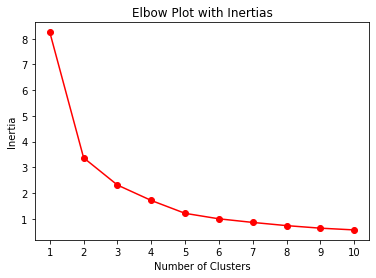

In [64]:
#plot inertias of models
plt.plot(ns, inertias, '-o', c='r')
plt.title('Elbow Plot with Inertias')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ns)
plt.show()

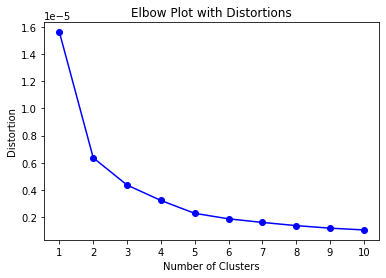

In [65]:
#plot distortions of models
plt.plot(ns, distortions, '-o', c='b')
plt.title('Elbow Plot with Distortions')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(ns)
plt.show()

In [71]:
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(purchases_norm)
purchases_norm_df['Labels'] = labels
purchases_norm_df

,InvoiceNo,Quantity,UnitPrice,InvoiceMonth,StockCode_enc,Country_enc,CustomerID_enc,TotalPrice,Labels
0,1.000000,0.000011,0.000005,0.000022,0.000000,0.0,0.000000,0.000029,1
1,1.000000,0.000011,0.000006,0.000022,0.000002,0.0,0.000000,0.000038,1
2,1.000000,0.000015,0.000005,0.000022,0.000004,0.0,0.000000,0.000041,1
3,1.000000,0.000011,0.000006,0.000022,0.000006,0.0,0.000000,0.000038,1
4,1.000000,0.000011,0.000006,0.000022,0.000007,0.0,0.000000,0.000038,1
...,...,...,...,...,...,...,...,...,...
528886,0.999931,0.000007,0.000006,0.000021,0.006369,0.0,0.009894,0.000023,3
528887,0.999951,0.000009,0.000007,0.000021,0.000237,0.0,0.009895,0.000036,2
528888,0.999951,0.000007,0.000007,0.000021,0.000103,0.0,0.009895,0.000028,2
528889,0.999951,0.000002,0.000009,0.000021,0.000399,0.0,0.009895,0.000009,2


In [72]:
df = pd.DataFrame({'label':labels, 'country':country_list})
df

ct = pd.crosstab(df['label'], df['country'])
ct

country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
label,,,,,,,,,,,,,,,,,,,,,
0,427,33,5,489,12,3,205,163,8,57,...,296,0,2,62,574,110,334,11,3,84648
1,725,175,12,1057,20,8,505,322,17,169,...,779,0,7,160,1557,230,803,11,27,199254
2,21,117,1,380,0,90,34,75,0,93,...,295,38,0,0,256,58,584,92,24,134535
3,9,73,0,105,0,50,4,54,0,61,...,131,19,0,0,97,53,245,65,14,65979


In [ ]:
xs = 
ys = 

##### 5. Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


##### 6. Compare the results of 4 and 5. Which approach do you think is best? Why?

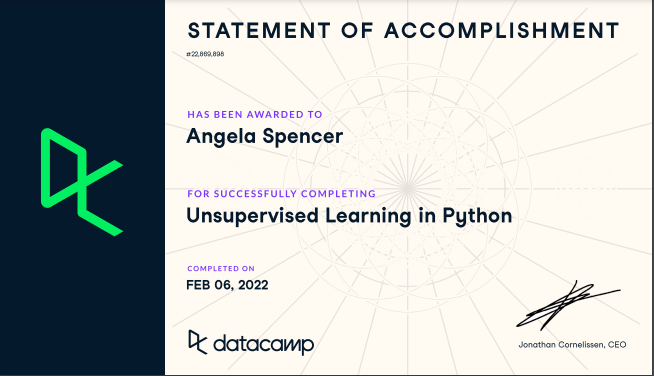